In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import FastICA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [4]:
X = data.iloc[:, 1:23]
Y = data.iloc[:,:1]

In [5]:
X['cap-shape'].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

In [6]:
X.info()
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number                 8124 non-null object
ring-type  

In [7]:
x = pd.get_dummies(X, prefix_sep='_')
#x1 = pd.get_dummies(X, prefix_sep='_')
#x = StandardScaler().fit_transform(x1)
y = pd.DataFrame(data = LabelEncoder().fit_transform(Y))
x.head()
x.info()
#y.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 117 entries, cap-shape_b to habitat_w
dtypes: uint8(117)
memory usage: 928.3 KB


C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 101)

In [9]:
model = DecisionTreeClassifier().fit(x_train, y_train)

[[1274    0]
 [   0 1164]]
1.0
0.0
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]


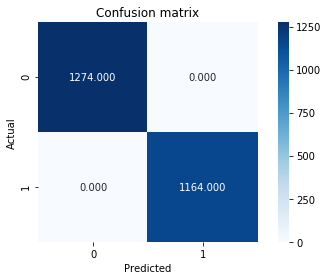

In [10]:
y_pred = model.predict(x_test)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()


# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score
print(f1_score(y_pred, y_test, average = None))

In [11]:
# WIth RANDOMFORESt and WITHOUT PCA
model = RandomForestClassifier(n_estimators=700).fit(x_train, y_train)

C:\Users\kalya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[[1274    0]
 [   0 1164]]
1.0
0.0
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]


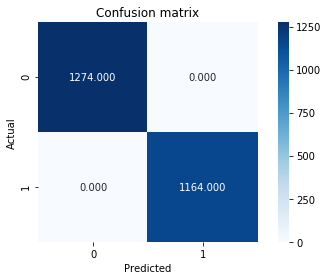

In [12]:
y_pred = model.predict(x_test)
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()


# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_pred)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_pred)) # error
print(metrics.precision_score(y_test, y_pred, average = None)) # precision
print(metrics.recall_score(y_test, y_pred, average = None)) # recall
print(metrics.f1_score(y_test, y_pred, average = None)) # F1 score
print(f1_score(y_pred, y_test, average = None))

In [13]:
# WITH PCA

ica = FastICA(n_components= None)
x_ica = ica.fit_transform(x) 
x_ica = pd.DataFrame(data = x_ica)


x_ica.head()

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
0,0.016804,0.005990,-0.015270,0.017727,0.019322,-0.018099,-0.027502,0.034583,0.008998,0.027961,...,0.016490,0.020395,0.006155,-0.018033,-0.005102,0.011820,0.011895,0.036145,0.008681,0.026132
1,0.003437,-0.021690,-0.018108,-0.009617,0.013676,-0.021517,-0.029822,0.020724,0.005218,0.015953,...,0.010295,0.013650,0.010274,0.009860,-0.016008,0.014899,0.007318,0.017209,-0.021684,0.020982
2,-0.017986,-0.026451,-0.031612,0.014156,0.033574,0.023894,0.033533,0.009249,-0.022980,0.007408,...,0.032389,-0.024314,0.031270,0.026462,0.043013,0.029974,0.032464,0.018125,0.031600,-0.024001
3,0.020710,-0.022331,-0.011364,0.019680,0.017369,0.020964,-0.003577,0.007239,0.008998,0.000618,...,0.013560,0.019418,0.004201,-0.041471,0.003687,0.020609,0.009942,0.013684,0.019424,0.025156
4,0.000020,0.010048,0.011189,-0.012547,-0.005855,-0.014192,-0.030310,0.010958,0.013519,0.014000,...,-0.020955,0.002908,-0.005351,0.012301,-0.018938,-0.031000,-0.025885,-0.020389,-0.019852,-0.013197


In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_ica,y, test_size = 0.3, random_state = 101)

modelICA = RandomForestClassifier(n_estimators=700).fit(x_train, y_train)

C:\Users\kalya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[[1274    0]
 [   0 1164]]
1.0
0.0
[1. 1.]
[1. 1.]
[1. 1.]
[1. 1.]


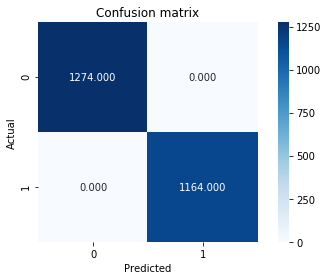

In [15]:
y_predICA = modelICA.predict(x_test)
conf_matrix = metrics.confusion_matrix(y_test, y_predICA)
print(conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()


# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_predICA)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_predICA)) # error
print(metrics.precision_score(y_test, y_predICA, average = None)) # precision
print(metrics.recall_score(y_test, y_predICA, average = None)) # recall
print(metrics.f1_score(y_test, y_predICA, average = None)) # F1 score
print(f1_score(y_predICA, y_test, average = None))

In [16]:
# WITH PCA

ica = FastICA(n_components= 3)
x_ica = ica.fit_transform(x) 
x_ica = pd.DataFrame(data = x_ica)


x_ica.head()

,0,1,2
0,-0.011319,0.008143,0.003246
1,-0.012692,0.003031,0.009588
2,-0.013747,0.003274,0.006581
3,-0.011454,0.004896,0.003103
4,-0.009851,0.014675,0.010935


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x_ica,y, test_size = 0.3, random_state = 101)

modelICA = RandomForestClassifier(n_estimators=700).fit(x_train, y_train)

C:\Users\kalya\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


[[1266    8]
 [  15 1149]]
0.9905660377358491
0.009433962264150941
[0.9882904  0.99308557]
[0.99372057 0.9871134 ]
[0.99099804 0.99009048]
[0.99099804 0.99009048]


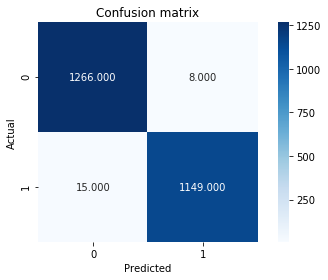

In [18]:
y_predICA = modelICA.predict(x_test)
conf_matrix = metrics.confusion_matrix(y_test, y_predICA)
print(conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()


# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_predICA)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_predICA)) # error
print(metrics.precision_score(y_test, y_predICA, average = None)) # precision
print(metrics.recall_score(y_test, y_predICA, average = None)) # recall
print(metrics.f1_score(y_test, y_predICA, average = None)) # F1 score
print(f1_score(y_predICA, y_test, average = None))

In [23]:
modelICADT = DecisionTreeClassifier().fit(x_train, y_train)


[[1266    8]
 [  24 1140]]
0.9868744872846595
0.01312551271534046
[0.98139535 0.99303136]
[0.99372057 0.97938144]
[0.9875195  0.98615917]
[0.9875195  0.98615917]


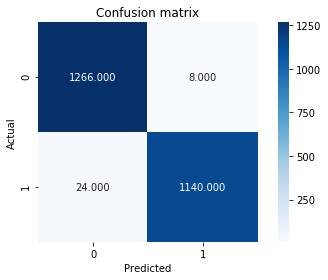

In [24]:
y_predICA = modelICADT.predict(x_test)
conf_matrix = metrics.confusion_matrix(y_test, y_predICA)
print(conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()


# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_predICA)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_predICA)) # error
print(metrics.precision_score(y_test, y_predICA, average = None)) # precision
print(metrics.recall_score(y_test, y_predICA, average = None)) # recall
print(metrics.f1_score(y_test, y_predICA, average = None)) # F1 score
print(f1_score(y_predICA, y_test, average = None))

In [25]:
# WIth RANDOMFOREST and WITH PCA
modelICARF = RandomForestClassifier(n_estimators=700).fit(x_train, y_train)

C:\Users\kalya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[[1266    8]
 [  13 1151]]
0.9913863822805579
0.008613617719442135
[0.98983581 0.9930975 ]
[0.99372057 0.98883162]
[0.99177438 0.99095997]
[0.99177438 0.99095997]


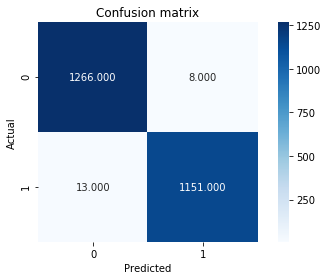

In [26]:
y_predICA = modelICARF.predict(x_test)
conf_matrix = metrics.confusion_matrix(y_test, y_predICA)
print(conf_matrix)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion matrix')
plt.tight_layout()


# Compute evaluation metrics
print(metrics.accuracy_score(y_test, y_predICA)) # accuracy
print(1 - metrics.accuracy_score(y_test, y_predICA)) # error
print(metrics.precision_score(y_test, y_predICA, average = None)) # precision
print(metrics.recall_score(y_test, y_predICA, average = None)) # recall
print(metrics.f1_score(y_test, y_predICA, average = None)) # F1 score
print(f1_score(y_predICA, y_test, average = None))